In [1]:
from qiskit import QuantumRegister,ClassicalRegister, QuantumCircuit, Aer, execute
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

/tmp/ipykernel_1624996/907148996.py:4: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


In [2]:
# N é um número inteiro e representa o número de qubits que será usado no circuito.
N = 1

In [3]:
q = QuantumRegister(N, 'q')
# Obs.: a variável N deve ser declarada pelo usuário com o número de qubits que serão utilizados.

b = ClassicalRegister(N, 'b')
# Obs.: variável N deve ser declarada pelo usuário com o número de bits que serão utilizados.

circuito = QuantumCircuit(q, b)

#### Sobre os ângulos de theta e phi 
* Figura 1: Representação da esfera de Bloch de um qubit. 
    * Escolhendo os ângulos θ e φ na equação (4), obtemos a representação da esfera de Bloch para os estados 
        * (a) |ψ| = |0> (θ = 0º ); (b) |ψ| = |1> (θ = 180º )
        * ...

In [4]:
# Definir os coeficientes de superposição
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)

In [5]:
# psi = [alpha,beta]
# circuito.initialize(psi,q[i])
#Obs.: o valor do ı́ndice i em q[i] deve ser substituı́do pelo valor que corresponde ao ı́ndice do qubit que se deseja inicializar.

# Caso deseje escolher o valor de alpha e beta descomente as linhas abaixo
# theta = (float(input("Insira o ângulo theta(°): ")))*np.pi/(180)
# phi = (float(input("Insira o ângulo phi(°): ")))*np.pi/(180)
# alpha = np.cos(theta/2)
# beta = (np.exp(1j*phi))*np.sin(theta/2)

In [6]:
estado_inicial = [alpha,beta]
circuito.initialize(estado_inicial,q[0])

/tmp/ipykernel_1623223/2512802682.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  processo = Aer.get_backend('statevector_simulator')
/tmp/ipykernel_1623223/2512802682.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  vector_de_estado = execute(circuito, backend=processo).result().get_statevector()


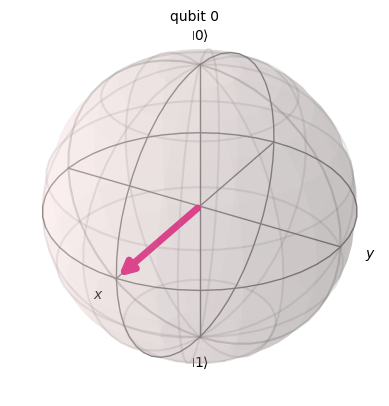

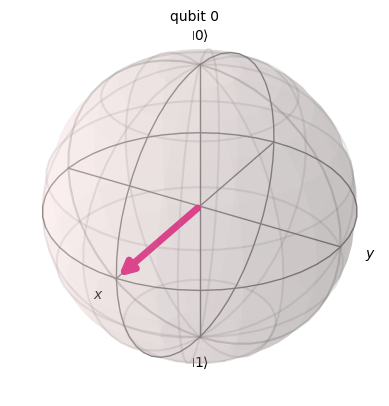

In [7]:
processo = Aer.get_backend('statevector_simulator')
vector_de_estado = execute(circuito, backend=processo).result().get_statevector()
plot_bloch_multivector(vector_de_estado)

## 3.3. Portas quânticas

In [8]:
q = QuantumRegister(1, 'q')
circuito = QuantumCircuit(q)
estado_inicial = [1,0]
circuito.initialize(estado_inicial,q)
circuito.x(q)

/home/marcusfreire/.cache/pypoetry/virtualenvs/fisica-paper-AJskT-D3-py3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


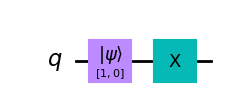

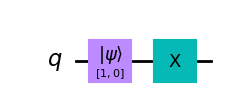

In [9]:
circuito.draw(output = 'mpl')

### 3.3.3. Portas de múltiplosqubits
* Implementação da porta CNOT
* Implementação da porta Toffoli

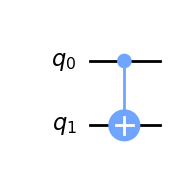

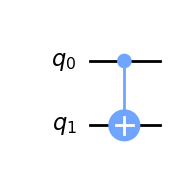

In [10]:
q = QuantumRegister(2, 'q')
circuito = QuantumCircuit(q)
circuito.cx(q[0],q[1])
circuito.draw(output = 'mpl')

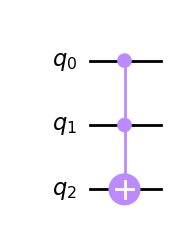

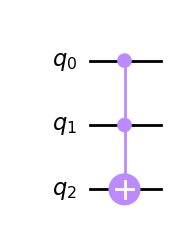

In [11]:
q = QuantumRegister(3, 'q')
circuito = QuantumCircuit(q)
circuito.ccx(q[0],q[1],q[2])
circuito.draw(output = 'mpl')

### 3.4. Medidas e distribuições de probabilidade

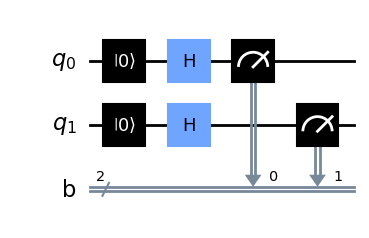

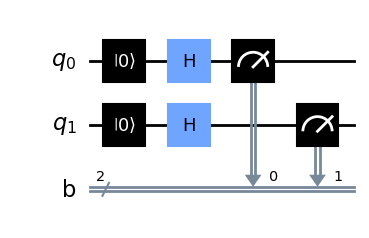

In [12]:
# Preparativos:
q = QuantumRegister(2, 'q') #Registrando os qubits
b = ClassicalRegister(2, 'b') #Registrando os Bits
circuito = QuantumCircuit(q,b) #Criando o Circuito
# Inicialização dos Estados:
circuito.reset(q)
# Aplicação das Portas:
circuito.h(q)

# Realização das Medidas
circuito.measure(q,b)
circuito.draw(output = 'mpl')

#### Simulando um circuito em um processador quântico ideal emulado numericamente

In [13]:
# número de repetições permitidas (shots)
s = 1024

simular = Aer.get_backend('qasm_simulator') 
resultadolocal = execute(circuito, backend= simular, shots = s).result()

/tmp/ipykernel_1623223/3341407813.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  resultadolocal = execute(circuito, backend= simular, shots = s).result()


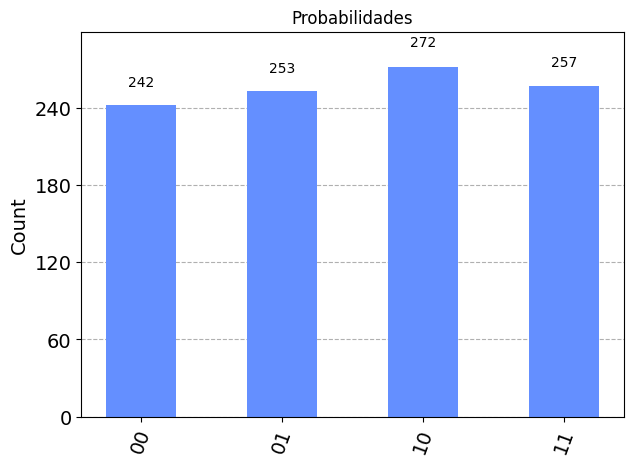

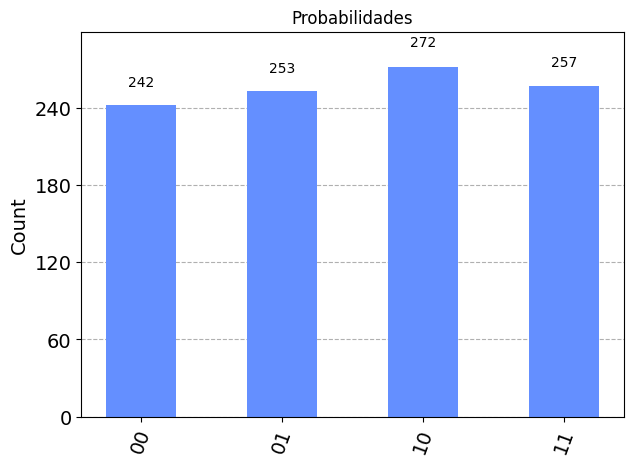

In [14]:
titulo = 'Probabilidades'
plot_histogram(resultadolocal.get_counts(circuito), title=titulo)